## TipTopTyping Performance Evaluation
### Descriptive Statistics

Performance measures in words per minute (WPM) and keystroke per character (KSPC)

2x2 factorial design (standing, walking / QWERTY, OPTI), text copy task over 4 sessions

### Data & Prerequisites

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("performance_data_overview.csv", sep=";")
df = pd.DataFrame(data)

# add a column named "Trial" to the dataframe
df.insert(6, "Trial", np.nan)

# for each row, if index is odd fill Trial column with 1 else 2
for i in range(len(df)):
    if i % 2 == 0:
        df.at[i, "Trial"] = 1
    else:
        df.at[i, "Trial"] = 2

df.head()

,Participant,sortID,Condition,Mobile Scenario,Layout,Run,Trial,Time needed (s),Characters Shown,Key Strokes,CPS,WPM,KSPC,TLXw,TLX
0,5,5,QS,Standing,QWERTY,1,1.0,171.78,71,103,0.413319,4.96,1.45,10.87,9.00
1,5,6,QW,Walking,QWERTY,2,2.0,150.38,97,99,0.645033,7.74,1.02,8.67,10.17
2,5,7,OW,Walking,OPTI,3,1.0,196.62,73,103,0.371275,4.46,1.41,11.60,13.00
3,5,8,OS,Standing,OPTI,4,2.0,181.82,88,102,0.483995,5.81,1.16,12.33,12.33
4,6,9,QW,Walking,QWERTY,1,1.0,178.50,96,132,0.537815,6.45,1.38,13.13,11.17


In [21]:
# function to calculate the percentage
def percentage(part, whole):
    return 100 * float(part) / float(whole)

title_keywords = ["Input Rate", "Accuracy", "Task Load"]

# plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fivethirtyeight')

plt.rcParams.update({'font.size': 13})

In [22]:
pivoted_df = df.pivot_table(index='Run', columns=['Layout', 'Mobile Scenario'], values=['WPM', 'KSPC'], aggfunc='mean')
pivoted_df.head()

KSPC                                  WPM          \
Layout              OPTI            QWERTY               OPTI           
Mobile Scenario Standing Walking  Standing   Walking Standing Walking   
Run                                                                     
1                  1.214   1.696  1.263333  1.500000    4.788   4.724   
2                  1.264   1.444  1.340000  1.343333    6.212   5.144   
3                  1.172   1.276  1.468333  1.282500    6.322   5.256   
4                  1.216   1.254  1.127500  1.606667    6.292   6.858   

                                     
Layout             QWERTY            
Mobile Scenario  Standing   Walking  
Run                                  
1                5.626667  5.665000  
2                6.770000  6.083333  
3                5.450000  5.967500  
4                8.587500  5.795000

In [23]:
runs_pivot = df.pivot_table(index='Run', columns='Layout', values=['WPM', 'KSPC'], aggfunc='mean')
runs_pivot.head()

KSPC           WPM       
Layout   OPTI QWERTY   OPTI QWERTY
Run                               
1       1.455  1.358  4.756  5.642
2       1.354  1.342  5.678  6.358
3       1.224  1.394  5.789  5.657
4       1.235  1.415  6.575  6.912

### Mean performance over four runs

In [24]:
# df with 'Run' as index and the mean values of 'WPM' and 'KSPC' as values
df_mean_over_runs = df.groupby('Run')[['WPM', 'KSPC', 'TLXw']].mean()
df_mean_over_runs.head()

,WPM,KSPC,TLXw
Run,,,
1,5.1990,1.4065,12.1000
2,6.0180,1.3480,11.9240
3,5.7230,1.3090,11.2865
4,6.7435,1.3250,11.4470


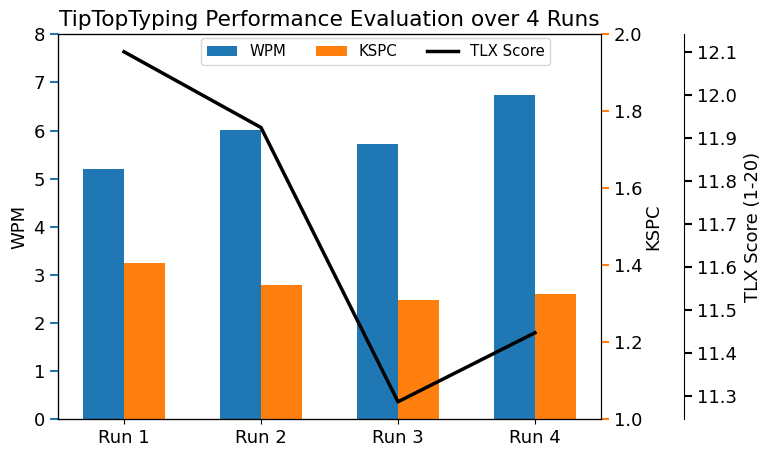

In [49]:
N = 4
wpm_mean_over_runs = df_mean_over_runs['WPM']
kspc_mean_over_runs = df_mean_over_runs['KSPC']
tlxw_mean_over_runs = df_mean_over_runs['TLXw']

ind = np.arange(N)  # the x locations for the groups
width = 0.3         # the width of the bars

fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(111)
ax2 = plt.twinx() # ax2 (second y-axis sharing the same x-axis)
ax3 = plt.twinx()

ax1.set_title('TipTopTyping Performance Evaluation over 4 Runs')

ax1.set_ylim([0, 8])
ax2.set_ylim([1, 2])

ax1.set_ylabel('WPM')
ax2.set_ylabel("KSPC", labelpad=1)
ax3.set_ylabel("TLX Score (1-20)", labelpad=5)

ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels( ('Run 1', 'Run 2', 'Run 3', 'Run 4') )

ax1.tick_params(axis='y', colors='tab:blue', labelcolor='black', length=6, width=1.5)
ax2.tick_params(axis='y', colors='tab:orange', labelcolor='black', length=6, width=1.5)
ax3.tick_params(axis='y', colors='black', labelcolor='black', length=6, width=1.5)

ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')

ax3.spines['right'].set_position(('outward', 60))

rects1 = ax1.bar(ind, wpm_mean_over_runs, width, color='tab:blue')
rects2 = ax2.bar(ind+width, kspc_mean_over_runs, width, color='tab:orange')
line1 = ax3.plot(ind+width/2, tlxw_mean_over_runs, color='black', linewidth=2.5)

# ax1.legend( (rects1[0], rects2[0], line1[0]), ('WPM', 'KSPC', 'TLX Score'))
ax1.legend((rects1[0], rects2[0], line1[0]), ('WPM', 'KSPC', 'TLX Score'), ncols=3, bbox_to_anchor=(.25, .9),
              loc='lower left', fontsize='small')

plt.show()

In [26]:
# [ ] create chart over 4 runs comparing WPM for each layout

### Mean performance measures between mobile conditions

In [27]:
mobile_pivot = df.pivot_table(index='Mobile Scenario', columns='Layout', values=['WPM', 'KSPC', 'TLXw'], aggfunc='mean')
mobile_pivot.head()

KSPC            TLXw              WPM        
Layout             OPTI  QWERTY    OPTI   QWERTY    OPTI  QWERTY
Mobile Scenario                                                 
Standing         1.2165  1.3130  11.427  11.2175  5.9035  6.3945
Walking          1.4175  1.4415  12.353  11.7600  5.4955  5.8900

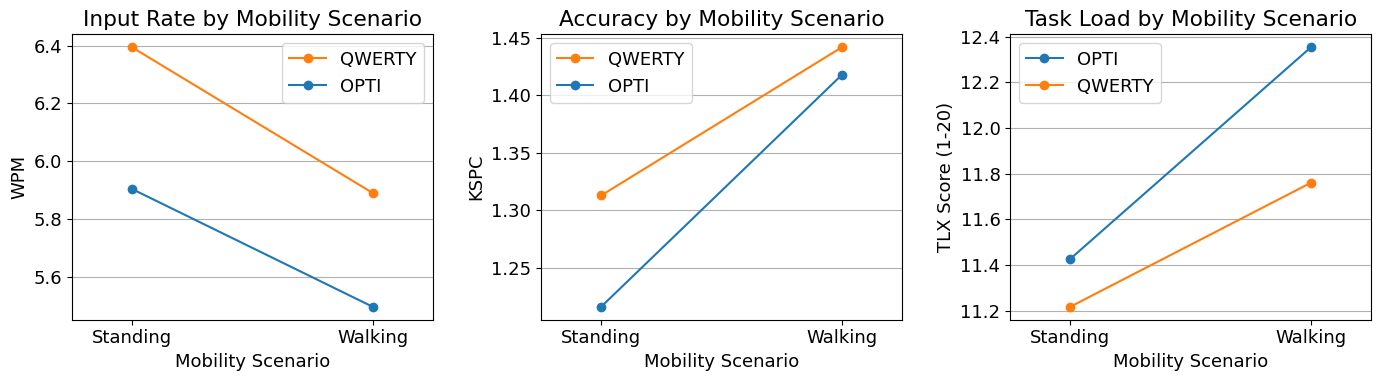

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Iterate through each value item ('WPM', 'KSPC', 'TLXw')
for i, value_item in enumerate(['WPM', 'KSPC', 'TLXw']):
    # Plot lines for each Layout
    mobile_pivot[value_item].plot(kind='line', ax=axes[i], marker='o', linestyle='-')
    
    axes[i].set_title(f'{title_keywords[i]} by Mobility Scenario')
    axes[i].set_xlabel('Mobility Scenario')
    axes[i].set_ylabel(value_item)
    
    x_values = range(len(mobile_pivot.index))
    x_labels = mobile_pivot.index
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels)  # Adjust rotation for better visibility
    
    axes[i].grid(axis='y')

    axes[i].set_xlim(x_values[0] - 0.25, x_values[-1] + 0.25)
    
    axes[i].legend(title=None)

# Adjustments
axes[0].legend(reverse=True)
axes[1].legend(reverse=True)
axes[2].set_ylabel("TLX Score (1-20)")
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

### Mean performance measures between consecutive trials

In [29]:
layout_trial_eval = df.groupby(['Layout', 'Trial'])[['WPM', 'KSPC', 'TLXw']].mean()
layout_trial_eval.head()

WPM    KSPC     TLXw
Layout Trial                         
OPTI   1.0    5.2725  1.3395  11.8400
       2.0    6.1265  1.2945  11.9400
QWERTY 1.0    5.6495  1.3760  11.5465
       2.0    6.6350  1.3785  11.4310

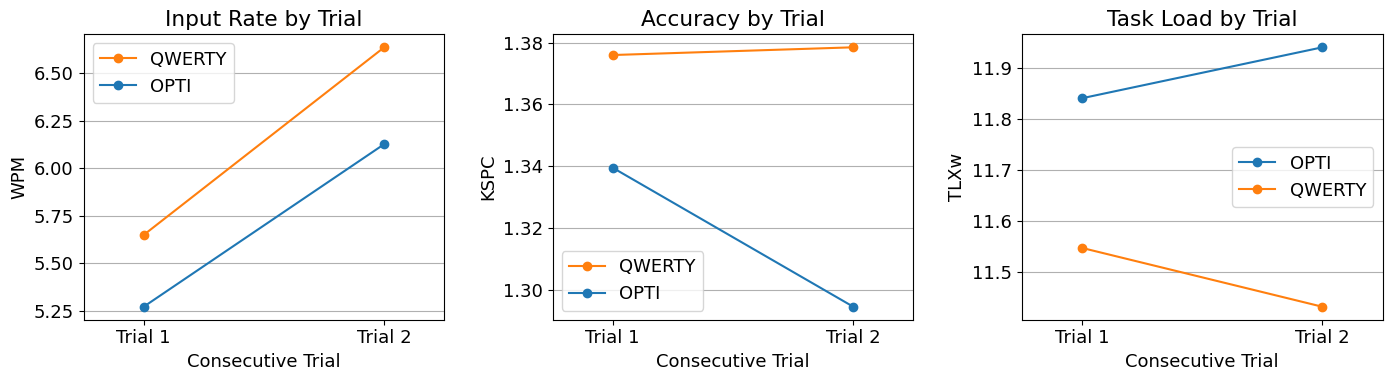

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Iterate through each value item ('WPM', 'KSPC', 'TLXw')
for i, value_item in enumerate(['WPM', 'KSPC', 'TLXw']):
    for n, layout in enumerate(['OPTI', 'QWERTY']):        
        axes[i].plot(layout_trial_eval[value_item][layout], marker='o', linestyle='-', label=layout) # Plot lines for each Layout
        
        # # dot annotations
        # y_values = round(layout_trial_eval[value_item][layout], 2)
        # x_values = 1,2
        # for x, y in zip(x_values, y_values):
        #     axes[i].annotate(f'({y})', (x, y))
        
    axes[i].set_title(f'{title_keywords[i]} by Trial')
    axes[i].set_xlabel('Consecutive Trial')
    axes[i].set_ylabel(value_item)
    
    x_values = 1,2
    x_labels = ["Trial 1", "Trial 2"]
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels)  
    
    axes[i].legend()
    axes[i].grid(axis='y')

    # Set x-axis limits
    axes[i].set_xlim(x_values[0] - 0.25, x_values[-1] + 0.25)
    
# Adjustments
axes[0].legend(reverse=True)
axes[1].legend(reverse=True)
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

### Mean performance measures between character layouts

In [31]:
layout_pivot = df.pivot_table(index='Layout', columns='Mobile Scenario', values=['WPM', 'KSPC', 'TLXw'], aggfunc='mean')
layout_pivot.head()

KSPC             TLXw              WPM        
Mobile Scenario Standing Walking Standing Walking Standing Walking
Layout                                                            
OPTI              1.2165  1.4175  11.4270  12.353   5.9035  5.4955
QWERTY            1.3130  1.4415  11.2175  11.760   6.3945  5.8900

In [32]:
layout_pivot['KSPC']['Standing']

Layout
OPTI      1.2165
QWERTY    1.3130
Name: Standing, dtype: float64

In [33]:
# layout_pivot = df.groupby(['Layout', 'Mobile Scenario'])[['WPM', 'KSPC', 'TLXw']].mean()
# layout_pivot.head()


In [34]:
# layout_pivot.loc['OPTI mean'] = layout_pivot[0:2].mean()
# layout_pivot.loc['QWERTY mean'] = layout_pivot[2:4].mean()

In [35]:
# layout_pivot[1:2].mean()

In [36]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# # Iterate through each value item ('WPM', 'KSPC', 'TLXw')
# for i, value_item in enumerate(['WPM', 'KSPC', 'TLXw']):
#     # layout_pivot[value_item].plot(kind='line', ax=axes[i], marker='o', linestyle='-')
#     # layout_pivot[value_item].plot(kind='bar', ax=axes[i])
    
#     axes[i].set_title(f'{value_item} by Layout')
#     axes[i].set_xlabel('Mobile Scenario')
#     axes[i].set_ylabel(value_item)
    
#     y1 = layout_pivot[value_item]['Standing']
#     y2 = layout_pivot[value_item]['Walking']
    
#     x_values = range(len(layout_pivot.index))
#     x_labels = layout_pivot.index
#     axes[i].set_xticks(x_values)
#     axes[i].set_xticklabels(x_labels)
    
#     axes[i].grid(axis='y')

#     axes[i].set_xlim(x_values[0] - 0.25, x_values[-1] + 0.25)
    
#     axes[i].fill_between(x_values, y1, y2, alpha=.5, linewidth=0)
#     # axes[i].plot(x, (y1 + y2)/2, linewidth=1.5)
    

# # axes[0].plot(layout_pivot['WPM_mean'], linestyle='--', color='black', label='Mean')
# # axes[1].plot(layout_pivot['KSPC_mean'], linestyle='--', color='black', label='Mean')
# # axes[2].plot(layout_pivot['TLXw_mean'], linestyle='--', color='black', label='Mean')

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.3)

# plt.show()

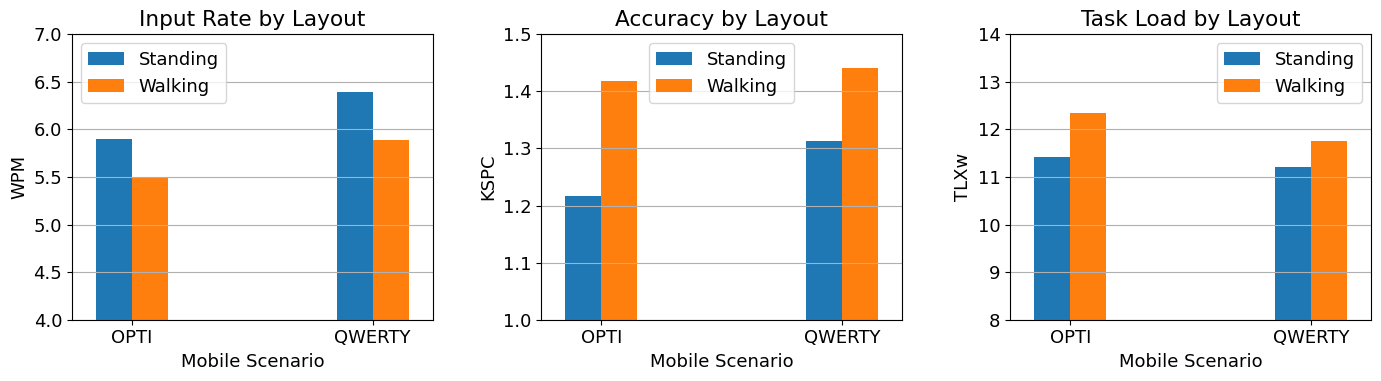

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Iterate through each value item ('WPM', 'KSPC', 'TLXw')
for i, value_item in enumerate(['WPM', 'KSPC', 'TLXw']):
    # layout_pivot[value_item].plot(kind='line', ax=axes[i], marker='o', linestyle='-')
    layout_pivot[value_item].plot(kind='bar', ax=axes[i], width=0.3)
    
    axes[i].set_title(f'{title_keywords[i]} by Layout')
    axes[i].set_xlabel('Mobility Scenario')
    axes[i].set_ylabel(value_item)
    
    x_values = range(len(layout_pivot.index))
    x_labels = layout_pivot.index
    axes[i].set_xticks(x_values)
    axes[i].set_xticklabels(x_labels, rotation=0)
    
    axes[i].grid(axis='y')

    axes[i].set_xlim(x_values[0] - 0.25, x_values[-1] + 0.25)
    
    axes[i].legend(title=None)

# axes[0].plot(layout_pivot['WPM_mean'], linestyle='--', color='black', label='Mean')
# axes[1].plot(layout_pivot['KSPC_mean'], linestyle='--', color='black', label='Mean')
# axes[2].plot(layout_pivot['TLXw_mean'], linestyle='--', color='black', label='Mean')

# Adjustments
axes[0].set_ylim(4, 7)
axes[1].set_ylim(1, 1.5)
axes[2].set_ylim(8, 14)
axes[1].legend(loc='upper center')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.show()

In [38]:
wpm_mean = wpm_mean_over_runs.mean()
kspc_mean = kspc_mean_over_runs.mean()
tlxw_mean = tlxw_mean_over_runs.mean()

df_means = pd.DataFrame({'WPM': wpm_mean, 'KSPC': kspc_mean, 'TLXw': tlxw_mean}, index=['Mean'])
df_means


,WPM,KSPC,TLXw
Mean,5.920875,1.347125,11.689375
